0    0
1    0
2    0
3    0
4    0
Name: Silloutte, dtype: int64
['Compactness', 'Asymmetry coefficient']


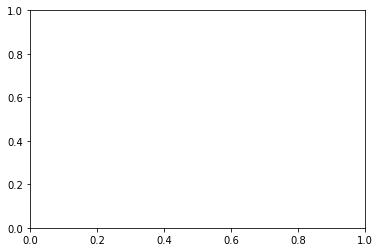

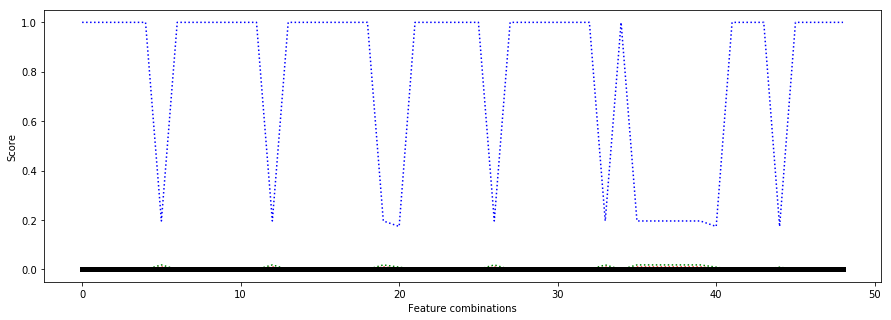

In [115]:
#get_ipython().run_line_magic('matplotlib', 'inline')


import os, numpy as np, pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

file = os.sep.join(['seeds_dataset.txt'])
data = pd.read_csv(file, sep="\t", header=None, names=["Area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry coefficient"," Length of kernel groove","Label"])

#data=data.drop(columns=['h'])
#data.head()




# #############################################################################
# Points

feature_names=[]
t_n_clusters=[]
t_homogenity=[]
t_completedness=[]
t_vmeasure=[]
t_silloutte=[]
t_rand_score=[]
t_mutual_info=[]
for i in range (0,7):
    for j in range (0,7):
        X= []
        feature_names.append([data.columns[i],data.columns[j]])
        
        
        for instance in data.values:
            #print(instance[1])
            tempL = []
            tempL.append(instance[i])
            tempL.append(instance[j])
            X.append(tempL)
        labels_true=data['Label'].values
        #print(labels_true)
        X = StandardScaler().fit_transform(X)


# #############################################################################
# Compute DBSCAN
        db = DBSCAN(eps=0.8, min_samples=8).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        '''print('Estimated number of clusters: %d' % n_clusters_)
        print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
        print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
        print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
        print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
        print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
        print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))'''
        t_n_clusters.append(n_clusters_)
        t_homogenity.append(metrics.homogeneity_score(labels_true, labels))
        t_completedness.append(metrics.completeness_score(labels_true, labels))
        t_vmeasure.append(metrics.v_measure_score(labels_true, labels))
        if n_clusters_>1:
            t_silloutte.append(metrics.silhouette_score(X, labels))
        else:
            t_silloutte.append(0)
        t_rand_score.append(metrics.adjusted_rand_score(labels_true, labels))
        t_mutual_info.append(metrics.adjusted_mutual_info_score(labels_true, labels))
# #############################################################################
# Plot result
        import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
        unique_labels = set(labels)
        colors = [plt.cm.Spectral(each)
                  for each in np.linspace(0, 1, len(unique_labels))]
        for k, col in zip(unique_labels, colors):
            if k == -1:
        # Black used for noise.
                col = [0, 0, 0, 1]

            class_member_mask = (labels == k)

            xy = X[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

            xy = X[class_member_mask & ~core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

        plt.title('Estimated number of clusters: %d' % n_clusters_)
        #plt.clf()
        #if n_clusters_ == 3:
        #plt.show()
        #plt.savefig('B1.png')
        #else:
            #plt.clf()
#print(feature_names)

dm_data={'Features':feature_names,'NoOfClusters':t_n_clusters,'Homogenity':t_homogenity,'Completedness':t_completedness,'V Measure':t_vmeasure,'Silloutte':t_silloutte,'Adj Rand Index':t_rand_score,'Mutual Info':t_mutual_info}
dm_anal=pd.DataFrame(data=dm_data)
dm_add={'Summary':(dm_anal['Silloutte']+dm_anal['Homogenity']+dm_anal['Mutual Info']+dm_anal['Adj Rand Index']+dm_anal['V Measure']+dm_anal['Completedness'])/6}
dm_anal['Summary']=dm_add['Summary']
#print(dm_anal)
plt.clf()
plt.ylim([0,1])
plt.figure(figsize=(15,5))
plt.ylabel('Score')
plt.xlabel('Feature combinations')
plt.plot(dm_anal.index, dm_anal['Homogenity'], 'r:',dm_anal.index, dm_anal['Completedness'], 'b:', dm_anal.index, dm_anal['V Measure'], 'g:', dm_anal.index,dm_anal['Adj Rand Index'],'y:', dm_anal.index,dm_anal['Mutual Info'],'c:')
plt.plot(dm_anal.index,dm_anal['Silloutte'],'k',linewidth=5)
#plt.plot(dm_anal.index,dm_anal['Summary'],'k',linewidth=5)
print(dm_anal['Silloutte'].nlargest())
print(dm_anal['Features'][19])
plt.savefig('G.png')

ValueError: Number of labels is 210. Valid values are 2 to n_samples - 1 (inclusive)

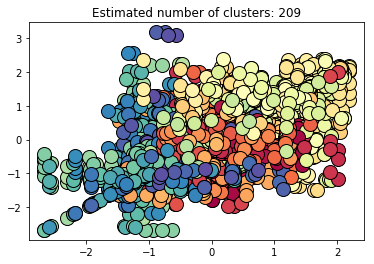

In [124]:
#get_ipython().run_line_magic('matplotlib', 'inline')


import os, numpy as np, pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

file = os.sep.join(['seeds_dataset.txt'])
data = pd.read_csv(file, sep="\t", header=None, names=["Area", "Perimeter", "Compactness", "Length of Kernel","Width of Kernel","Asymmetry coefficient"," Length of kernel groove","Label"])

#data=data.drop(columns=['h'])
#data.head()




# #############################################################################
# Points
FINAL=[]
for ab in range (0, 1):
    for bc in range (1, 2):

        feature_names=[]
        t_n_clusters=[]
        t_homogenity=[]
        t_completedness=[]
        t_vmeasure=[]
        t_silloutte=[]
        t_rand_score=[]
        t_mutual_info=[]
        for i in range (0,7):
            for j in range (0,7):
                X= []
                feature_names.append([data.columns[i],data.columns[j]])


                for instance in data.values:
                    #print(instance[1])
                    tempL = []
                    tempL.append(instance[i])
                    tempL.append(instance[j])
                    X.append(tempL)
                labels_true=data['Label'].values
                #print(labels_true)
                X = StandardScaler().fit_transform(X)


        # #############################################################################
        # Compute DBSCAN
                db = DBSCAN(eps=((ab/10)+0.01), min_samples=bc).fit(X)
                core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
                core_samples_mask[db.core_sample_indices_] = True
                labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
                n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

                '''print('Estimated number of clusters: %d' % n_clusters_)
                print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
                print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
                print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
                print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
                print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
                print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))'''
                t_n_clusters.append(n_clusters_)
                t_homogenity.append(metrics.homogeneity_score(labels_true, labels))
                t_completedness.append(metrics.completeness_score(labels_true, labels))
                t_vmeasure.append(metrics.v_measure_score(labels_true, labels))
                if n_clusters_>1:
                    t_silloutte.append(metrics.silhouette_score(X, labels))
                else:
                    t_silloutte.append(0)
                t_rand_score.append(metrics.adjusted_rand_score(labels_true, labels))
                t_mutual_info.append(metrics.adjusted_mutual_info_score(labels_true, labels))
        # #############################################################################
        # Plot result
                import matplotlib.pyplot as plt

        # Black removed and is used for noise instead.
                unique_labels = set(labels)
                colors = [plt.cm.Spectral(each)
                          for each in np.linspace(0, 1, len(unique_labels))]
                for k, col in zip(unique_labels, colors):
                    if k == -1:
                # Black used for noise.
                        col = [0, 0, 0, 1]

                    class_member_mask = (labels == k)

                    xy = X[class_member_mask & core_samples_mask]
                    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=14)

                    xy = X[class_member_mask & ~core_samples_mask]
                    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                     markeredgecolor='k', markersize=6)

                plt.title('Estimated number of clusters: %d' % n_clusters_)
                #plt.clf()
                #if n_clusters_ == 3:
                #plt.show()
                #plt.savefig('B1.png')
                #else:
                    #plt.clf()
        #print(feature_names)

        dm_data={'Features':feature_names,'NoOfClusters':t_n_clusters,'Homogenity':t_homogenity,'Completedness':t_completedness,'V Measure':t_vmeasure,'Silloutte':t_silloutte,'Adj Rand Index':t_rand_score,'Mutual Info':t_mutual_info}
        dm_anal=pd.DataFrame(data=dm_data)
        dm_add={'Summary':(dm_anal['Silloutte']+dm_anal['Homogenity']+dm_anal['Mutual Info']+dm_anal['Adj Rand Index']+dm_anal['V Measure']+dm_anal['Completedness'])/6}
        dm_anal['Summary']=dm_add['Summary']
        #print(dm_anal)
        plt.clf()
        plt.ylim([0,1])
        plt.figure(figsize=(15,5))
        plt.ylabel('Score')
        plt.xlabel('Feature combinations')
        plt.plot(dm_anal.index, dm_anal['Homogenity'], 'r:',dm_anal.index, dm_anal['Completedness'], 'b:', dm_anal.index, dm_anal['V Measure'], 'g:', dm_anal.index,dm_anal['Adj Rand Index'],'y:', dm_anal.index,dm_anal['Mutual Info'],'c:')
        plt.plot(dm_anal.index,dm_anal['Silloutte'],'k',linewidth=5)
        #plt.plot(dm_anal.index,dm_anal['Summary'],'k',linewidth=5)
        #print(dm_anal['Silloutte'].nlargest())
        FINAL.append(dm_anal['Silloutte'].nlargerst())
        #print(dm_anal['Features'][19])
        #plt.savefig('G.png')
print(FINAL)